In [ ]:
!sudo apt-get install tesseract-ocr libtesseract-dev libleptonica-dev pkg-config
!pip install tesserocr
!sudo apt install tesseract-ocr
!pip install pydub
## Install dependencies
!pip install wget
!apt-get update && apt-get install -y libsndfile1 ffmpeg
!pip install unidecode

# ## Install NeMo
BRANCH = 'v1.0.0oldpreln'
!python -m pip install git+https://github.com/NVIDIA/NeMo.git@$BRANCH#egg=nemo_toolkit[asr]

## Install TorchAudio
!pip install torchaudio -f https://download.pytorch.org/whl/torch_stable.html

!pip install moviepy

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9675 sha256=e0904456efbf2fe72f91004c96df58209f95ec8ea55a31dfdb4ae69596e37a98
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.d

In [ ]:
import pydub
sound = pydub.AudioSegment.from_file("harry_potter.mp4", "mp4")
sound = sound.set_channels(1)
sound = sound.set_frame_rate(16000)
sound.export("harry.wav", format="wav")

<_io.BufferedRandom name='harry.wav'>

In [ ]:
an4_audio = '/content/harry.wav'

Let's plot and listen to the audio and visualize the RTTM speaker labels

In [ ]:
import IPython

IPython.display.Audio(an4_audio)

In [ ]:
paths2audio_files = [an4_audio]
print(paths2audio_files)

['/content/harry.wav']


In [ ]:
import os
import wget
from omegaconf import OmegaConf
ROOT = os.getcwd()
data_dir = os.path.join(ROOT,'data')
MODEL_CONFIG = os.path.join(data_dir,'speaker_diarization.yaml')
if not os.path.exists(MODEL_CONFIG):
    config_url = "https://raw.githubusercontent.com/NVIDIA/NeMo/main/examples/speaker_recognition/conf/speaker_diarization.yaml"
    MODEL_CONFIG = wget.download(config_url,data_dir)
config = OmegaConf.load(MODEL_CONFIG)
config['diarizer']['oracle_num_speakers'] = 3
print(OmegaConf.to_yaml(config))

name: ClusterDiarizer
num_workers: 4
sample_rate: 16000
diarizer:
  oracle_num_speakers: 3
  max_num_speakers: 20
  out_dir: outputs
  paths2audio_files: ???
  path2groundtruth_rttm_files: null
  vad:
    model_path: vad_marblenet
    window_length_in_sec: 0.25
    shift_length_in_sec: 0.01
    threshold: 0.7
    vad_decision_smoothing: true
    smoothing_params:
      method: median
      overlap: 0.875
  speaker_embeddings:
    oracle_vad_manifest: null
    model_path: speakerdiarization_speakernet
    window_length_in_sec: 1.5
    shift_length_in_sec: 0.75



In [ ]:
pretrained_vad = 'vad_marblenet'
pretrained_speaker_model = 'speakerdiarization_speakernet'

In [ ]:
output_dir = os.path.join(ROOT,'outputs')
config.diarizer.paths2audio_files = paths2audio_files
config.diarizer.path2groundtruth_rttm_files = None
config.diarizer.out_dir = output_dir # Directory to store intermediate files and prediction outputs
config.diarizer.speaker_embeddings.model_path = pretrained_speaker_model

#Here we use our inhouse pretrained NeMo VAD 
config.diarizer.vad.model_path = pretrained_vad
config.diarizer.vad.window_length_in_sec = 0.25
config.diarizer.vad.shift_length_in_sec = 0.01
config.diarizer.vad.threshold = 0.7

In [ ]:
print(OmegaConf.to_yaml(config))

name: ClusterDiarizer
num_workers: 4
sample_rate: 16000
diarizer:
  oracle_num_speakers: 3
  max_num_speakers: 20
  out_dir: /content/outputs
  paths2audio_files:
  - /content/harry.wav
  path2groundtruth_rttm_files: null
  vad:
    model_path: vad_marblenet
    window_length_in_sec: 0.25
    shift_length_in_sec: 0.01
    threshold: 0.7
    vad_decision_smoothing: true
    smoothing_params:
      method: median
      overlap: 0.875
  speaker_embeddings:
    oracle_vad_manifest: null
    model_path: speakerdiarization_speakernet
    window_length_in_sec: 1.5
    shift_length_in_sec: 0.75



In [ ]:
from nemo.collections.asr.models import ClusteringDiarizer
sd_model = ClusteringDiarizer(cfg=config)

[NeMo W 2021-06-10 22:50:52 optimizers:46] Apex was not found. Using the lamb optimizer will error out.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


[NeMo W 2021-06-10 22:50:58 experimental:28] Module <class 'nemo.collections.asr.data.audio_to_text_dali.AudioToCharDALIDataset'> is experimental, not ready for production and is not fully supported. Use at your own risk.


[NeMo I 2021-06-10 22:50:58 clustering_diarizer:143] Loading pretrained vad_marblenet model from NGC
[NeMo I 2021-06-10 22:50:58 cloud:66] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/vad_marblenet/versions/1.0.0rc1/files/vad_marblenet.nemo to /root/.cache/torch/NeMo/NeMo_1.0.0/vad_marblenet/10477085f32c378938ef41e65dc2e1b3/vad_marblenet.nemo


################################################################################
### WARNING, path does not exist: KALDI_ROOT=/mnt/matylda5/iveselyk/Tools/kaldi-trunk
###          (please add 'export KALDI_ROOT=<your_path>' in your $HOME/.profile)
###          (or run as: KALDI_ROOT=<your_path> python <your_script>.py)
################################################################################



[NeMo I 2021-06-10 22:50:58 cloud:79] Download from cloud failed. Attempt 1 of 3
[NeMo I 2021-06-10 22:51:00 common:674] Instantiating model from pre-trained checkpoint


[NeMo W 2021-06-10 22:51:00 modelPT:138] Please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    vad_stream: false
    manifest_filepath: /home/fjia/code/manifest64/train.json
    sample_rate: 16000
    labels:
    - background
    - speech
    batch_size: 128
    num_workers: 20
    shuffle: true
    augmentor:
      shift:
        prob: 0.8
        min_shift_ms: -5.0
        max_shift_ms: 5.0
      white_noise:
        prob: 0.8
        min_level: -90
        max_level: -46
    
[NeMo W 2021-06-10 22:51:00 modelPT:145] Please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    vad_stream: false
    manifest_filepath: /home/fjia/code/manifest64/validation.json
    sample_rate: 16000
    labels:
    - background
    - speech
    batch_size: 128
    

[NeMo I 2021-06-10 22:51:11 modelPT:434] Model EncDecClassificationModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.0.0/vad_marblenet/10477085f32c378938ef41e65dc2e1b3/vad_marblenet.nemo.
[NeMo I 2021-06-10 22:51:11 clustering_diarizer:122] Loading pretrained speakerdiarization_speakernet model from NGC
[NeMo I 2021-06-10 22:51:11 cloud:66] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/speakerdiarization_speakernet/versions/1.0.0rc1/files/speakerdiarization_speakernet.nemo to /root/.cache/torch/NeMo/NeMo_1.0.0/speakerdiarization_speakernet/eba9223fbafd1a0fb48ae8c38c448c90/speakerdiarization_speakernet.nemo
[NeMo I 2021-06-10 22:51:14 common:674] Instantiating model from pre-trained checkpoint


[NeMo W 2021-06-10 22:51:14 modelPT:138] Please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_vad_energy/vox1vox2_fisher_swbd_train_manifest.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    time_length: 3
    num_workers: 15
    pin_memory: true
    
[NeMo W 2021-06-10 22:51:14 modelPT:145] Please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_filepath: /manifests/combined_vad_energy/vox1vox2_fisher_swbd_dev_manifest.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: false
    time_length: 3
    num_workers: 15
    pin_memory: true
    


[NeMo I 2021-06-10 22:51:14 features:252] PADDING: 16
[NeMo I 2021-06-10 22:51:14 features:269] STFT using torch
[NeMo I 2021-06-10 22:51:14 label_models:88] Training with Angular Softmax Loss
[NeMo I 2021-06-10 22:51:14 modelPT:434] Model ExtractSpeakerEmbeddingsModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.0.0/speakerdiarization_speakernet/eba9223fbafd1a0fb48ae8c38c448c90/speakerdiarization_speakernet.nemo.


In [ ]:
sd_model.diarize()

[NeMo I 2021-06-10 22:51:14 clustering_diarizer:319] Performing VAD
[NeMo I 2021-06-10 22:51:14 clustering_diarizer:326] Split long audio file to avoid CUDA memory issue
[NeMo I 2021-06-10 22:51:14 classification_models:245] Perform streaming frame-level VAD
[NeMo I 2021-06-10 22:51:14 audio_to_label:449] Time length considered for collate func is 0.25
[NeMo I 2021-06-10 22:51:14 audio_to_label:450] Shift length considered for collate func is 0.01
[NeMo I 2021-06-10 22:51:14 collections:267] Filtered duration for loading collection is 0.000000.
[NeMo I 2021-06-10 22:51:14 collections:270] # 5 files loaded accounting to # 1 labels


[NeMo W 2021-06-10 22:51:14 nemo_logging:349] /usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
      cpuset_checked))
    
100%|██████████| 5/5 [00:01<00:00,  2.88it/s]

[NeMo I 2021-06-10 22:51:16 clustering_diarizer:223] Generating predictions with overlapping input segments


[NeMo I 2021-06-10 22:51:17 clustering_diarizer:234] Converting frame level prediction to speech/no-speech segment in start and end times format.
[NeMo I 2021-06-10 22:51:18 clustering_diarizer:247] Extracting embeddings for Diarization
[NeMo I 2021-06-10 22:51:18 audio_to_label:449] Time length considered for collate func is 1.5
[NeMo I 2021-06-10 22:51:18 audio_to_label:450] Shift length considered for collate func is 0.75
[NeMo I 2021-06-10 22:51:18 collections:267] Filtered duration for loading collection is 0.000000.
[NeMo I 2021-06-10 22:51:18 collections:270] # 139 files loaded accounting to # 1 labels
[NeMo I 2021-06-10 22:51:18 label_models:119] Setting up diarization parameters


  0%|          | 0/139 [00:00<?, ?it/s][NeMo W 2021-06-10 22:51:18 patch_utils:50] torch.stft() signature has been updated for PyTorch 1.7+
    Please update PyTorch to remain compatible with later versions of NeMo.
100%|██████████| 139/139 [00:01<00:00, 74.11it/s]

[NeMo I 2021-06-10 22:51:20 clustering_diarizer:279] Saved embedding files to /content/outputs/speaker_outputs/embeddings
[NeMo I 2021-06-10 22:51:20 speaker_utils:193] Number of files to diarize: 1
[NeMo I 2021-06-10 22:51:20 speaker_utils:195] sample 'harry' embeddings shape is (256,)
    
[NeMo I 2021-06-10 22:51:20 speaker_utils:337] Performing Clustering



100%|██████████| 1/1 [00:00<00:00,  3.15it/s]
[NeMo W 2021-06-10 22:51:20 speaker_utils:351] Please check if each ground truth RTTMs was present in provided path2groundtruth_rttm_files
[NeMo W 2021-06-10 22:51:20 speaker_utils:352] Skipping calculation of Diariazation Error Rate


In [ ]:
!cat outputs/pred_rttms/an4_diarize_test.rttm

cat: outputs/pred_rttms/an4_diarize_test.rttm: No such file or directory


In [ ]:
from nemo.collections.asr.parts.speaker_utils import rttm_to_labels, labels_to_pyannote_object
pred_labels = rttm_to_labels('outputs/pred_rttms/harry.rttm')
segmentation = labels_to_pyannote_object(pred_labels)

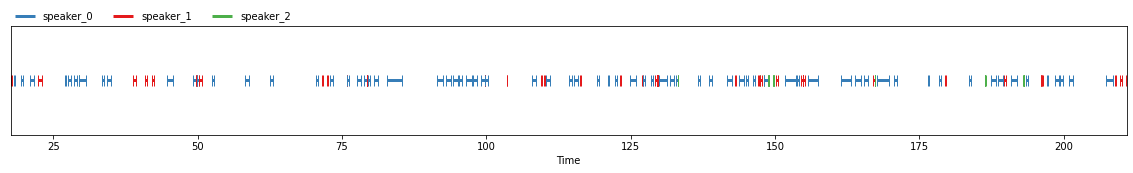

In [ ]:
segmentation

In [ ]:
import datetime
def format_time(second):
    hours = second // 3600
    minutes = (second - hours * 3600) // 60
    second = second - hours * 3600 - minutes * 60
    t = datetime.time(hour=hours, minute=minutes, second=second)
    return datetime.time.isoformat(t)

In [ ]:
from PIL import Image
def save_image(ex_folder, currSegment, img: Image, starts: int, ends: int):
    #Save caption images to folder
    start_time = format_time(starts)
    end_time = format_time(ends)
    speaker = str(list(segmentation.get_labels(currSegment))[0])
    timeline = speaker + '_' + '-'.join([start_time, end_time]) + ".png"
    try:
        imgname = os.path.join(ex_folder, timeline)
        img.save(imgname)
        print('export subtitle at %s' % timeline)
    except Exception:
        print('export subtitle at %s error' % timeline)


In [ ]:
from moviepy.editor import *  
def save_video(ex_folder, currSegment, clip1: VideoFileClip, starts: int, ends: int):
    #Save caption images to folder
    start_time = format_time(starts)
    end_time = format_time(ends)
    speaker = str(list(segmentation.get_labels(currSegment))[0])
    timeline = speaker + '_' + '-'.join([start_time, end_time]) + ".mp4"
    try:
        clipname = os.path.join(ex_folder, timeline)
        clip1.write_videofile(clipname, temp_audiofile='temp-audio.m4a', remove_temp=True, codec="libx264", audio_codec="aac")
        print('export video at %s' % timeline)
    except Exception:
        print('export video at %s error' % timeline)


In [ ]:
import cv2
import os
video_filename = "harry_potter.mp4"
import tesserocr as tr
from PIL import Image
import numpy as np

clip = VideoFileClip("harry_potter.mp4")
cap = cv2.VideoCapture("harry_potter.mp4")
fps = cap.get(cv2.CAP_PROP_FPS)
ex_folder = os.path.splitext(video_filename)[0]


if not os.path.exists(ex_folder):
  os.mkdir(ex_folder)

for x in segmentation.itersegments():
  clip1 = clip.subclip(x.start, x.end)
  save_video(ex_folder, x, clip1, int(x.start), int(x.end))
  
  cap = cv2.VideoCapture("harry_potter.mp4")
  cap.set(1,fps*((next(segmentation.itersegments()).start+next(segmentation.itersegments()).end)/2)); # Where frame_no is the frame you want
  ret, frame = cap.read()
  cv_img = frame[:, :, 0]
  pil_img = Image.fromarray(cv2.cvtColor(cv_img,cv2.COLOR_BGR2RGB))
  api = tr.PyTessBaseAPI()
  try:
    api.SetImage(pil_img)
    # Google tesseract-ocr has a page segmentation methos(psm) option for specifying ocr types
    # psm values can be: block of text, single text line, single word, single character etc.
    boxes = api.GetComponentImages(tr.RIL.TEXTLINE,True)
  finally:
    api.End()

  save_image(ex_folder, x, boxes[-1][0], int(x.start), int(x.end))
  

[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:00:17-00:00:17.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 6/6 [00:00<00:00, 205.32it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:00:17-00:00:17.mp4




100%|██████████| 9/9 [00:00<00:00, 101.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:00:17-00:00:17.mp4 

export video at speaker_speaker_1_00:00:17-00:00:17.mp4
export subtitle at speaker_speaker_1_00:00:17-00:00:17.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:00:18-00:00:18.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 4/4 [00:00<00:00, 1127.73it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:00:18-00:00:18.mp4




100%|██████████| 5/5 [00:00<00:00, 110.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:00:18-00:00:18.mp4 

export video at speaker_speaker_0_00:00:18-00:00:18.mp4
export subtitle at speaker_speaker_0_00:00:18-00:00:18.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:00:19-00:00:19.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 6/6 [00:00<00:00, 1894.59it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:00:19-00:00:19.mp4




100%|██████████| 9/9 [00:00<00:00, 116.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:00:19-00:00:19.mp4 

export video at speaker_speaker_0_00:00:19-00:00:19.mp4
export subtitle at speaker_speaker_0_00:00:19-00:00:19.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:00:21-00:00:21.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 16/16 [00:00<00:00, 1165.85it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:00:21-00:00:21.mp4




100%|██████████| 21/21 [00:00<00:00, 101.66it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:00:21-00:00:21.mp4 

export video at speaker_speaker_0_00:00:21-00:00:21.mp4
export subtitle at speaker_speaker_0_00:00:21-00:00:21.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:00:22-00:00:23.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 16/16 [00:00<00:00, 3016.81it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:00:22-00:00:23.mp4




100%|██████████| 21/21 [00:00<00:00, 111.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:00:22-00:00:23.mp4 

export video at speaker_speaker_1_00:00:22-00:00:23.mp4
export subtitle at speaker_speaker_1_00:00:22-00:00:23.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:00:27-00:00:27.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 6/6 [00:00<00:00, 388.83it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:00:27-00:00:27.mp4




100%|██████████| 7/7 [00:00<00:00, 100.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:00:27-00:00:27.mp4 

export video at speaker_speaker_0_00:00:27-00:00:27.mp4
export subtitle at speaker_speaker_0_00:00:27-00:00:27.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:00:27-00:00:28.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 12/12 [00:00<00:00, 1849.95it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:00:27-00:00:28.mp4




100%|██████████| 15/15 [00:00<00:00, 109.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:00:27-00:00:28.mp4 

export video at speaker_speaker_0_00:00:27-00:00:28.mp4
export subtitle at speaker_speaker_0_00:00:27-00:00:28.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:00:28-00:00:29.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 15/15 [00:00<00:00, 3154.40it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:00:28-00:00:29.mp4




100%|██████████| 20/20 [00:00<00:00, 110.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:00:28-00:00:29.mp4 

export video at speaker_speaker_0_00:00:28-00:00:29.mp4
export subtitle at speaker_speaker_0_00:00:28-00:00:29.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_2_00:00:29-00:00:29.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 134.39it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_2_00:00:29-00:00:29.mp4




100%|██████████| 1/1 [00:00<00:00, 110.43it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_2_00:00:29-00:00:29.mp4 



export video at speaker_speaker_2_00:00:29-00:00:29.mp4
export subtitle at speaker_speaker_2_00:00:29-00:00:29.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:00:29-00:00:30.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 26/26 [00:00<00:00, 2563.70it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:00:29-00:00:30.mp4




100%|██████████| 36/36 [00:00<00:00, 97.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:00:29-00:00:30.mp4 

export video at speaker_speaker_0_00:00:29-00:00:30.mp4
export subtitle at speaker_speaker_0_00:00:29-00:00:30.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:00:33-00:00:33.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 10/10 [00:00<00:00, 712.97it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:00:33-00:00:33.mp4




100%|██████████| 14/14 [00:00<00:00, 97.90it/s] 


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:00:33-00:00:33.mp4 

export video at speaker_speaker_0_00:00:33-00:00:33.mp4
export subtitle at speaker_speaker_0_00:00:33-00:00:33.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:00:34-00:00:35.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 18/18 [00:00<00:00, 3126.71it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:00:34-00:00:35.mp4




100%|██████████| 24/24 [00:00<00:00, 100.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:00:34-00:00:35.mp4 

export video at speaker_speaker_0_00:00:34-00:00:35.mp4
export subtitle at speaker_speaker_0_00:00:34-00:00:35.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:00:38-00:00:39.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 13/13 [00:00<00:00, 914.80it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:00:38-00:00:39.mp4




100%|██████████| 17/17 [00:00<00:00, 106.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:00:38-00:00:39.mp4 

export video at speaker_speaker_1_00:00:38-00:00:39.mp4
export subtitle at speaker_speaker_1_00:00:38-00:00:39.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:00:40-00:00:41.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 8/8 [00:00<00:00, 765.12it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:00:40-00:00:41.mp4




100%|██████████| 10/10 [00:00<00:00, 104.67it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:00:40-00:00:41.mp4 

export video at speaker_speaker_1_00:00:40-00:00:41.mp4
export subtitle at speaker_speaker_1_00:00:40-00:00:41.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:00:42-00:00:42.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 9/9 [00:00<00:00, 1985.42it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:00:42-00:00:42.mp4




100%|██████████| 12/12 [00:00<00:00, 121.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:00:42-00:00:42.mp4 

export video at speaker_speaker_1_00:00:42-00:00:42.mp4
export subtitle at speaker_speaker_1_00:00:42-00:00:42.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:00:44-00:00:45.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 23/23 [00:00<00:00, 1557.58it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:00:44-00:00:45.mp4




100%|██████████| 31/31 [00:00<00:00, 90.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:00:44-00:00:45.mp4 

export video at speaker_speaker_0_00:00:44-00:00:45.mp4
export subtitle at speaker_speaker_0_00:00:44-00:00:45.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:00:49-00:00:49.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 12/12 [00:00<00:00, 668.49it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:00:49-00:00:49.mp4




100%|██████████| 15/15 [00:00<00:00, 93.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:00:49-00:00:49.mp4 

export video at speaker_speaker_0_00:00:49-00:00:49.mp4
export subtitle at speaker_speaker_0_00:00:49-00:00:49.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:00:49-00:00:49.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 914.19it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:00:49-00:00:49.mp4




100%|██████████| 1/1 [00:00<00:00, 245.76it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:00:49-00:00:49.mp4 



export video at speaker_speaker_1_00:00:49-00:00:49.mp4
export subtitle at speaker_speaker_1_00:00:49-00:00:49.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:00:49-00:00:49.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 1120.57it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:00:49-00:00:49.mp4




100%|██████████| 1/1 [00:00<00:00, 113.14it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:00:49-00:00:49.mp4 



export video at speaker_speaker_1_00:00:49-00:00:49.mp4
export subtitle at speaker_speaker_1_00:00:49-00:00:49.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:00:49-00:00:50.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 9/9 [00:00<00:00, 1781.69it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:00:49-00:00:50.mp4




100%|██████████| 12/12 [00:00<00:00, 88.66it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:00:49-00:00:50.mp4 

export video at speaker_speaker_0_00:00:49-00:00:50.mp4
export subtitle at speaker_speaker_0_00:00:49-00:00:50.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:00:50-00:00:50.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 10/10 [00:00<00:00, 1777.77it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:00:50-00:00:50.mp4




100%|██████████| 14/14 [00:00<00:00, 92.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:00:50-00:00:50.mp4 

export video at speaker_speaker_1_00:00:50-00:00:50.mp4
export subtitle at speaker_speaker_1_00:00:50-00:00:50.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:00:52-00:00:52.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 8/8 [00:00<00:00, 452.67it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:00:52-00:00:52.mp4




100%|██████████| 11/11 [00:00<00:00, 86.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:00:52-00:00:52.mp4 

export video at speaker_speaker_0_00:00:52-00:00:52.mp4
export subtitle at speaker_speaker_0_00:00:52-00:00:52.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:00:58-00:00:58.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 15/15 [00:00<00:00, 866.00it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:00:58-00:00:58.mp4




100%|██████████| 20/20 [00:00<00:00, 96.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:00:58-00:00:58.mp4 

export video at speaker_speaker_0_00:00:58-00:00:58.mp4
export subtitle at speaker_speaker_0_00:00:58-00:00:58.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:01:02-00:01:03.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 12/12 [00:00<00:00, 698.94it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:01:02-00:01:03.mp4




100%|██████████| 16/16 [00:00<00:00, 101.64it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:01:02-00:01:03.mp4 

export video at speaker_speaker_0_00:01:02-00:01:03.mp4
export subtitle at speaker_speaker_0_00:01:02-00:01:03.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:01:10-00:01:10.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 9/9 [00:00<00:00, 513.87it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:01:10-00:01:10.mp4




100%|██████████| 12/12 [00:00<00:00, 87.20it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:01:10-00:01:10.mp4 

export video at speaker_speaker_0_00:01:10-00:01:10.mp4
export subtitle at speaker_speaker_0_00:01:10-00:01:10.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:01:11-00:01:11.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 5/5 [00:00<00:00, 2301.28it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:01:11-00:01:11.mp4




100%|██████████| 6/6 [00:00<00:00, 111.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:01:11-00:01:11.mp4 

export video at speaker_speaker_1_00:01:11-00:01:11.mp4
export subtitle at speaker_speaker_1_00:01:11-00:01:11.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:01:12-00:01:12.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 6/6 [00:00<00:00, 1680.30it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:01:12-00:01:12.mp4




100%|██████████| 8/8 [00:00<00:00, 92.55it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:01:12-00:01:12.mp4 

export video at speaker_speaker_1_00:01:12-00:01:12.mp4
export subtitle at speaker_speaker_1_00:01:12-00:01:12.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:01:12-00:01:13.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 15/15 [00:00<00:00, 1273.63it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:01:12-00:01:13.mp4




100%|██████████| 21/21 [00:00<00:00, 109.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:01:12-00:01:13.mp4 

export video at speaker_speaker_0_00:01:12-00:01:13.mp4
export subtitle at speaker_speaker_0_00:01:12-00:01:13.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:01:15-00:01:15.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 105.08it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:01:15-00:01:15.mp4




100%|██████████| 1/1 [00:00<00:00, 109.69it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:01:15-00:01:15.mp4 



export video at speaker_speaker_1_00:01:15-00:01:15.mp4
export subtitle at speaker_speaker_1_00:01:15-00:01:15.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:01:15-00:01:16.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 8/8 [00:00<00:00, 3110.92it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:01:15-00:01:16.mp4




100%|██████████| 10/10 [00:00<00:00, 102.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:01:15-00:01:16.mp4 

export video at speaker_speaker_0_00:01:15-00:01:16.mp4
export subtitle at speaker_speaker_0_00:01:15-00:01:16.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:01:17-00:01:18.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 15/15 [00:00<00:00, 1484.39it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:01:17-00:01:18.mp4




100%|██████████| 21/21 [00:00<00:00, 92.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:01:17-00:01:18.mp4 

export video at speaker_speaker_0_00:01:17-00:01:18.mp4
export subtitle at speaker_speaker_0_00:01:17-00:01:18.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:01:18-00:01:19.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 12/12 [00:00<00:00, 3346.74it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:01:18-00:01:19.mp4




100%|██████████| 16/16 [00:00<00:00, 109.42it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:01:18-00:01:19.mp4 

export video at speaker_speaker_0_00:01:18-00:01:19.mp4
export subtitle at speaker_speaker_0_00:01:18-00:01:19.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:01:19-00:01:19.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 1296.54it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:01:19-00:01:19.mp4




100%|██████████| 1/1 [00:00<00:00, 139.75it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:01:19-00:01:19.mp4 



export video at speaker_speaker_1_00:01:19-00:01:19.mp4
export subtitle at speaker_speaker_1_00:01:19-00:01:19.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:01:19-00:01:19.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 1214.68it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:01:19-00:01:19.mp4




100%|██████████| 1/1 [00:00<00:00, 212.56it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:01:19-00:01:19.mp4 



export video at speaker_speaker_1_00:01:19-00:01:19.mp4
export subtitle at speaker_speaker_1_00:01:19-00:01:19.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:01:19-00:01:19.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 161.63it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:01:19-00:01:19.mp4




100%|██████████| 1/1 [00:00<00:00, 189.88it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:01:19-00:01:19.mp4 



export video at speaker_speaker_1_00:01:19-00:01:19.mp4
export subtitle at speaker_speaker_1_00:01:19-00:01:19.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:01:19-00:01:19.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 648.37it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:01:19-00:01:19.mp4




100%|██████████| 1/1 [00:00<00:00, 200.36it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:01:19-00:01:19.mp4 



export video at speaker_speaker_1_00:01:19-00:01:19.mp4
export subtitle at speaker_speaker_1_00:01:19-00:01:19.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:01:19-00:01:19.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 9/9 [00:00<00:00, 1163.47it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:01:19-00:01:19.mp4




100%|██████████| 12/12 [00:00<00:00, 100.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:01:19-00:01:19.mp4 

export video at speaker_speaker_0_00:01:19-00:01:19.mp4
export subtitle at speaker_speaker_0_00:01:19-00:01:19.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:01:20-00:01:21.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 14/14 [00:00<00:00, 829.34it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:01:20-00:01:21.mp4




100%|██████████| 19/19 [00:00<00:00, 103.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:01:20-00:01:21.mp4 

export video at speaker_speaker_0_00:01:20-00:01:21.mp4
export subtitle at speaker_speaker_0_00:01:20-00:01:21.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:01:22-00:01:25.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 57/57 [00:00<00:00, 407.31it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:01:22-00:01:25.mp4




100%|██████████| 78/78 [00:01<00:00, 51.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:01:22-00:01:25.mp4 

export video at speaker_speaker_0_00:01:22-00:01:25.mp4
export subtitle at speaker_speaker_0_00:01:22-00:01:25.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:01:31-00:01:32.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 25/25 [00:00<00:00, 1517.32it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:01:31-00:01:32.mp4




100%|██████████| 34/34 [00:00<00:00, 95.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:01:31-00:01:32.mp4 

export video at speaker_speaker_0_00:01:31-00:01:32.mp4
export subtitle at speaker_speaker_0_00:01:31-00:01:32.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:01:33-00:01:33.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 20/20 [00:00<00:00, 1094.12it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:01:33-00:01:33.mp4




100%|██████████| 27/27 [00:00<00:00, 93.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:01:33-00:01:33.mp4 

export video at speaker_speaker_0_00:01:33-00:01:33.mp4
export subtitle at speaker_speaker_0_00:01:33-00:01:33.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:01:34-00:01:35.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 21/21 [00:00<00:00, 2532.87it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:01:34-00:01:35.mp4




100%|██████████| 28/28 [00:00<00:00, 93.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:01:34-00:01:35.mp4 

export video at speaker_speaker_0_00:01:34-00:01:35.mp4
export subtitle at speaker_speaker_0_00:01:34-00:01:35.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:01:35-00:01:35.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 13/13 [00:00<00:00, 2729.71it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:01:35-00:01:35.mp4




100%|██████████| 18/18 [00:00<00:00, 83.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:01:35-00:01:35.mp4 

export video at speaker_speaker_0_00:01:35-00:01:35.mp4
export subtitle at speaker_speaker_0_00:01:35-00:01:35.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:01:36-00:01:37.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 22/22 [00:00<00:00, 1257.63it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:01:36-00:01:37.mp4




100%|██████████| 30/30 [00:00<00:00, 89.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:01:36-00:01:37.mp4 

export video at speaker_speaker_0_00:01:36-00:01:37.mp4
export subtitle at speaker_speaker_0_00:01:36-00:01:37.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:01:37-00:01:38.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 17/17 [00:00<00:00, 1367.40it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:01:37-00:01:38.mp4




100%|██████████| 23/23 [00:00<00:00, 100.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:01:37-00:01:38.mp4 

export video at speaker_speaker_0_00:01:37-00:01:38.mp4
export subtitle at speaker_speaker_0_00:01:37-00:01:38.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:01:39-00:01:39.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 14/14 [00:00<00:00, 764.59it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:01:39-00:01:39.mp4




100%|██████████| 19/19 [00:00<00:00, 104.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:01:39-00:01:39.mp4 

export video at speaker_speaker_0_00:01:39-00:01:39.mp4
export subtitle at speaker_speaker_0_00:01:39-00:01:39.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:01:39-00:01:39.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 1417.95it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:01:39-00:01:39.mp4




100%|██████████| 1/1 [00:00<00:00, 180.56it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:01:39-00:01:39.mp4 



export video at speaker_speaker_1_00:01:39-00:01:39.mp4
export subtitle at speaker_speaker_1_00:01:39-00:01:39.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:01:39-00:01:39.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 2009.73it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:01:39-00:01:39.mp4




100%|██████████| 1/1 [00:00<00:00, 198.87it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:01:39-00:01:39.mp4 



export video at speaker_speaker_1_00:01:39-00:01:39.mp4
export subtitle at speaker_speaker_1_00:01:39-00:01:39.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:01:39-00:01:39.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 704.45it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:01:39-00:01:39.mp4




100%|██████████| 1/1 [00:00<00:00, 70.61it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:01:39-00:01:39.mp4 



export video at speaker_speaker_1_00:01:39-00:01:39.mp4
export subtitle at speaker_speaker_1_00:01:39-00:01:39.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:01:39-00:01:39.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 1041.03it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:01:39-00:01:39.mp4




100%|██████████| 1/1 [00:00<00:00, 196.70it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:01:39-00:01:39.mp4 



export video at speaker_speaker_1_00:01:39-00:01:39.mp4
export subtitle at speaker_speaker_1_00:01:39-00:01:39.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:01:39-00:01:40.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 9/9 [00:00<00:00, 1186.77it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:01:39-00:01:40.mp4




100%|██████████| 12/12 [00:00<00:00, 97.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:01:39-00:01:40.mp4 

export video at speaker_speaker_0_00:01:39-00:01:40.mp4
export subtitle at speaker_speaker_0_00:01:39-00:01:40.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:01:43-00:01:43.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 89.02it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:01:43-00:01:43.mp4




100%|██████████| 1/1 [00:00<00:00, 165.70it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:01:43-00:01:43.mp4 



export video at speaker_speaker_1_00:01:43-00:01:43.mp4
export subtitle at speaker_speaker_1_00:01:43-00:01:43.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:01:47-00:01:48.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 15/15 [00:00<00:00, 659.14it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:01:47-00:01:48.mp4




100%|██████████| 21/21 [00:00<00:00, 107.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:01:47-00:01:48.mp4 

export video at speaker_speaker_0_00:01:47-00:01:48.mp4
export subtitle at speaker_speaker_0_00:01:47-00:01:48.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:01:49-00:01:49.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 6/6 [00:00<00:00, 1284.69it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:01:49-00:01:49.mp4




100%|██████████| 8/8 [00:00<00:00, 119.05it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:01:49-00:01:49.mp4 

export video at speaker_speaker_1_00:01:49-00:01:49.mp4
export subtitle at speaker_speaker_1_00:01:49-00:01:49.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:01:49-00:01:50.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 6/6 [00:00<00:00, 855.69it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:01:49-00:01:50.mp4




100%|██████████| 8/8 [00:00<00:00, 100.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:01:49-00:01:50.mp4 

export video at speaker_speaker_1_00:01:49-00:01:50.mp4
export subtitle at speaker_speaker_1_00:01:49-00:01:50.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:01:50-00:01:51.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 16/16 [00:00<00:00, 1413.29it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:01:50-00:01:51.mp4




100%|██████████| 22/22 [00:00<00:00, 108.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:01:50-00:01:51.mp4 

export video at speaker_speaker_0_00:01:50-00:01:51.mp4
export subtitle at speaker_speaker_0_00:01:50-00:01:51.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:01:54-00:01:54.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 11/11 [00:00<00:00, 775.70it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:01:54-00:01:54.mp4




100%|██████████| 15/15 [00:00<00:00, 92.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:01:54-00:01:54.mp4 

export video at speaker_speaker_0_00:01:54-00:01:54.mp4
export subtitle at speaker_speaker_0_00:01:54-00:01:54.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:01:55-00:01:55.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 15/15 [00:00<00:00, 2288.30it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:01:55-00:01:55.mp4




100%|██████████| 20/20 [00:00<00:00, 88.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:01:55-00:01:55.mp4 

export video at speaker_speaker_0_00:01:55-00:01:55.mp4
export subtitle at speaker_speaker_0_00:01:55-00:01:55.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:01:56-00:01:56.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 5/5 [00:00<00:00, 1257.44it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:01:56-00:01:56.mp4




100%|██████████| 7/7 [00:00<00:00, 89.37it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:01:56-00:01:56.mp4 

export video at speaker_speaker_1_00:01:56-00:01:56.mp4
export subtitle at speaker_speaker_1_00:01:56-00:01:56.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:01:59-00:01:59.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 7/7 [00:00<00:00, 338.94it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:01:59-00:01:59.mp4




100%|██████████| 9/9 [00:00<00:00, 97.18it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:01:59-00:01:59.mp4 

export video at speaker_speaker_0_00:01:59-00:01:59.mp4
export subtitle at speaker_speaker_0_00:01:59-00:01:59.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:01-00:02:01.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 6/6 [00:00<00:00, 1873.99it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:01-00:02:01.mp4




100%|██████████| 9/9 [00:00<00:00, 107.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:01-00:02:01.mp4 

export video at speaker_speaker_0_00:02:01-00:02:01.mp4
export subtitle at speaker_speaker_0_00:02:01-00:02:01.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:02-00:02:02.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 8/8 [00:00<00:00, 711.92it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:02-00:02:02.mp4




100%|██████████| 10/10 [00:00<00:00, 101.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:02-00:02:02.mp4 

export video at speaker_speaker_0_00:02:02-00:02:02.mp4
export subtitle at speaker_speaker_0_00:02:02-00:02:02.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:02:03-00:02:03.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 6/6 [00:00<00:00, 2192.53it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:02:03-00:02:03.mp4




100%|██████████| 7/7 [00:00<00:00, 101.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:02:03-00:02:03.mp4 

export video at speaker_speaker_1_00:02:03-00:02:03.mp4
export subtitle at speaker_speaker_1_00:02:03-00:02:03.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:04-00:02:06.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 25/25 [00:00<00:00, 1480.87it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:04-00:02:06.mp4




100%|██████████| 33/33 [00:00<00:00, 96.40it/s] 


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:04-00:02:06.mp4 

export video at speaker_speaker_0_00:02:04-00:02:06.mp4
export subtitle at speaker_speaker_0_00:02:04-00:02:06.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:02:07-00:02:07.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 246.72it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:02:07-00:02:07.mp4




100%|██████████| 2/2 [00:00<00:00, 118.47it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:02:07-00:02:07.mp4 



export video at speaker_speaker_1_00:02:07-00:02:07.mp4
export subtitle at speaker_speaker_1_00:02:07-00:02:07.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:07-00:02:07.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 10/10 [00:00<00:00, 619.06it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:07-00:02:07.mp4




100%|██████████| 13/13 [00:00<00:00, 112.95it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:07-00:02:07.mp4 

export video at speaker_speaker_0_00:02:07-00:02:07.mp4
export subtitle at speaker_speaker_0_00:02:07-00:02:07.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:08-00:02:08.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 10/10 [00:00<00:00, 1749.16it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:08-00:02:08.mp4




100%|██████████| 14/14 [00:00<00:00, 97.74it/s] 


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:08-00:02:08.mp4 

export video at speaker_speaker_0_00:02:08-00:02:08.mp4
export subtitle at speaker_speaker_0_00:02:08-00:02:08.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:02:09-00:02:09.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 5/5 [00:00<00:00, 423.64it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:02:09-00:02:09.mp4




100%|██████████| 6/6 [00:00<00:00, 90.38it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:02:09-00:02:09.mp4 

export video at speaker_speaker_1_00:02:09-00:02:09.mp4
export subtitle at speaker_speaker_1_00:02:09-00:02:09.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:02:09-00:02:09.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 228.88it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:02:09-00:02:09.mp4




100%|██████████| 1/1 [00:00<00:00, 82.40it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:02:09-00:02:09.mp4 



export video at speaker_speaker_1_00:02:09-00:02:09.mp4
export subtitle at speaker_speaker_1_00:02:09-00:02:09.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:02:09-00:02:09.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 1316.89it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:02:09-00:02:09.mp4




100%|██████████| 1/1 [00:00<00:00, 207.36it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:02:09-00:02:09.mp4 



export video at speaker_speaker_1_00:02:09-00:02:09.mp4
export subtitle at speaker_speaker_1_00:02:09-00:02:09.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:02:09-00:02:09.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 1767.51it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:02:09-00:02:09.mp4




100%|██████████| 1/1 [00:00<00:00, 238.49it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:02:09-00:02:09.mp4 



export video at speaker_speaker_1_00:02:09-00:02:09.mp4
export subtitle at speaker_speaker_1_00:02:09-00:02:09.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:02:09-00:02:09.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 744.46it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:02:09-00:02:09.mp4




100%|██████████| 1/1 [00:00<00:00, 119.90it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:02:09-00:02:09.mp4 



export video at speaker_speaker_1_00:02:09-00:02:09.mp4
export subtitle at speaker_speaker_1_00:02:09-00:02:09.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:02:09-00:02:09.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 915.19it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:02:09-00:02:09.mp4




100%|██████████| 1/1 [00:00<00:00, 124.94it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:02:09-00:02:09.mp4 



export video at speaker_speaker_1_00:02:09-00:02:09.mp4
export subtitle at speaker_speaker_1_00:02:09-00:02:09.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:02:09-00:02:09.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 1652.60it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:02:09-00:02:09.mp4




100%|██████████| 1/1 [00:00<00:00, 129.67it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:02:09-00:02:09.mp4 



export video at speaker_speaker_1_00:02:09-00:02:09.mp4
export subtitle at speaker_speaker_1_00:02:09-00:02:09.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:09-00:02:11.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 33/33 [00:00<00:00, 402.07it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:09-00:02:11.mp4




100%|██████████| 45/45 [00:00<00:00, 96.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:09-00:02:11.mp4 

export video at speaker_speaker_0_00:02:09-00:02:11.mp4
export subtitle at speaker_speaker_0_00:02:09-00:02:11.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:11-00:02:12.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 13/13 [00:00<00:00, 966.10it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:11-00:02:12.mp4




100%|██████████| 17/17 [00:00<00:00, 96.46it/s] 


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:11-00:02:12.mp4 

export video at speaker_speaker_0_00:02:11-00:02:12.mp4
export subtitle at speaker_speaker_0_00:02:11-00:02:12.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:12-00:02:13.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 7/7 [00:00<00:00, 3285.97it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:12-00:02:13.mp4




100%|██████████| 9/9 [00:00<00:00, 123.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:12-00:02:13.mp4 

export video at speaker_speaker_0_00:02:12-00:02:13.mp4
export subtitle at speaker_speaker_0_00:02:12-00:02:13.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_2_00:02:13-00:02:13.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 1790.91it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_2_00:02:13-00:02:13.mp4




100%|██████████| 1/1 [00:00<00:00, 217.72it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_2_00:02:13-00:02:13.mp4 



export video at speaker_speaker_2_00:02:13-00:02:13.mp4
export subtitle at speaker_speaker_2_00:02:13-00:02:13.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:16-00:02:17.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 8/8 [00:00<00:00, 668.93it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:16-00:02:17.mp4




100%|██████████| 11/11 [00:00<00:00, 86.73it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:16-00:02:17.mp4 

export video at speaker_speaker_0_00:02:16-00:02:17.mp4
export subtitle at speaker_speaker_0_00:02:16-00:02:17.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:18-00:02:19.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 12/12 [00:00<00:00, 1159.96it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:18-00:02:19.mp4




100%|██████████| 17/17 [00:00<00:00, 88.60it/s] 


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:18-00:02:19.mp4 

export video at speaker_speaker_0_00:02:18-00:02:19.mp4
export subtitle at speaker_speaker_0_00:02:18-00:02:19.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:21-00:02:22.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 19/19 [00:00<00:00, 1391.75it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:21-00:02:22.mp4




100%|██████████| 25/25 [00:00<00:00, 102.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:21-00:02:22.mp4 

export video at speaker_speaker_0_00:02:21-00:02:22.mp4
export subtitle at speaker_speaker_0_00:02:21-00:02:22.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:02:23-00:02:23.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 5/5 [00:00<00:00, 1343.47it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:02:23-00:02:23.mp4




100%|██████████| 7/7 [00:00<00:00, 100.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:02:23-00:02:23.mp4 

export video at speaker_speaker_1_00:02:23-00:02:23.mp4
export subtitle at speaker_speaker_1_00:02:23-00:02:23.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:23-00:02:24.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 19/19 [00:00<00:00, 1028.27it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:23-00:02:24.mp4




100%|██████████| 26/26 [00:00<00:00, 87.76it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:23-00:02:24.mp4 

export video at speaker_speaker_0_00:02:23-00:02:24.mp4
export subtitle at speaker_speaker_0_00:02:23-00:02:24.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:25-00:02:25.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 6/6 [00:00<00:00, 514.84it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:25-00:02:25.mp4




100%|██████████| 8/8 [00:00<00:00, 113.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:25-00:02:25.mp4 

export video at speaker_speaker_0_00:02:25-00:02:25.mp4
export subtitle at speaker_speaker_0_00:02:25-00:02:25.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:26-00:02:26.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 8/8 [00:00<00:00, 537.90it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:26-00:02:26.mp4




100%|██████████| 10/10 [00:00<00:00, 116.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:26-00:02:26.mp4 

export video at speaker_speaker_0_00:02:26-00:02:26.mp4
export subtitle at speaker_speaker_0_00:02:26-00:02:26.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:02:27-00:02:27.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 1546.00it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:02:27-00:02:27.mp4




100%|██████████| 1/1 [00:00<00:00, 183.49it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:02:27-00:02:27.mp4 



export video at speaker_speaker_1_00:02:27-00:02:27.mp4
export subtitle at speaker_speaker_1_00:02:27-00:02:27.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_2_00:02:27-00:02:27.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 1718.27it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_2_00:02:27-00:02:27.mp4




100%|██████████| 1/1 [00:00<00:00, 190.49it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_2_00:02:27-00:02:27.mp4 



export video at speaker_speaker_2_00:02:27-00:02:27.mp4
export subtitle at speaker_speaker_2_00:02:27-00:02:27.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:02:27-00:02:27.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 7/7 [00:00<00:00, 1508.98it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:02:27-00:02:27.mp4




100%|██████████| 10/10 [00:00<00:00, 77.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:02:27-00:02:27.mp4 

export video at speaker_speaker_1_00:02:27-00:02:27.mp4
export subtitle at speaker_speaker_1_00:02:27-00:02:27.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_2_00:02:28-00:02:28.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 1974.72it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_2_00:02:28-00:02:28.mp4




100%|██████████| 1/1 [00:00<00:00, 165.93it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_2_00:02:28-00:02:28.mp4 



export video at speaker_speaker_2_00:02:28-00:02:28.mp4
export subtitle at speaker_speaker_2_00:02:28-00:02:28.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:28-00:02:28.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 17/17 [00:00<00:00, 1679.62it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:28-00:02:28.mp4




100%|██████████| 22/22 [00:00<00:00, 95.42it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:28-00:02:28.mp4 

export video at speaker_speaker_0_00:02:28-00:02:28.mp4
export subtitle at speaker_speaker_0_00:02:28-00:02:28.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_2_00:02:28-00:02:28.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 1938.22it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_2_00:02:28-00:02:28.mp4




100%|██████████| 1/1 [00:00<00:00, 97.84it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_2_00:02:28-00:02:28.mp4 



export video at speaker_speaker_2_00:02:28-00:02:28.mp4
export subtitle at speaker_speaker_2_00:02:28-00:02:28.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_2_00:02:28-00:02:28.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 581.49it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_2_00:02:28-00:02:28.mp4




100%|██████████| 1/1 [00:00<00:00, 177.92it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_2_00:02:28-00:02:28.mp4 



export video at speaker_speaker_2_00:02:28-00:02:28.mp4
export subtitle at speaker_speaker_2_00:02:28-00:02:28.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_2_00:02:28-00:02:28.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 1298.95it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_2_00:02:28-00:02:28.mp4




100%|██████████| 1/1 [00:00<00:00, 71.63it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_2_00:02:28-00:02:28.mp4 



export video at speaker_speaker_2_00:02:28-00:02:28.mp4
export subtitle at speaker_speaker_2_00:02:28-00:02:28.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_2_00:02:29-00:02:29.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 1437.39it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_2_00:02:29-00:02:29.mp4




100%|██████████| 1/1 [00:00<00:00, 149.86it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_2_00:02:29-00:02:29.mp4 



export video at speaker_speaker_2_00:02:29-00:02:29.mp4
export subtitle at speaker_speaker_2_00:02:29-00:02:29.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_2_00:02:29-00:02:29.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 1822.03it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_2_00:02:29-00:02:29.mp4




100%|██████████| 1/1 [00:00<00:00, 125.04it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_2_00:02:29-00:02:29.mp4 



export video at speaker_speaker_2_00:02:29-00:02:29.mp4
export subtitle at speaker_speaker_2_00:02:29-00:02:29.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_2_00:02:29-00:02:29.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 669.59it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_2_00:02:29-00:02:29.mp4




100%|██████████| 1/1 [00:00<00:00, 215.18it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_2_00:02:29-00:02:29.mp4 



export video at speaker_speaker_2_00:02:29-00:02:29.mp4
export subtitle at speaker_speaker_2_00:02:29-00:02:29.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:02:30-00:02:30.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 6/6 [00:00<00:00, 1928.27it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:02:30-00:02:30.mp4




100%|██████████| 9/9 [00:00<00:00, 106.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:02:30-00:02:30.mp4 

export video at speaker_speaker_1_00:02:30-00:02:30.mp4
export subtitle at speaker_speaker_1_00:02:30-00:02:30.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:31-00:02:33.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 43/43 [00:00<00:00, 297.78it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:31-00:02:33.mp4




100%|██████████| 58/58 [00:00<00:00, 70.87it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:31-00:02:33.mp4 

export video at speaker_speaker_0_00:02:31-00:02:33.mp4
export subtitle at speaker_speaker_0_00:02:31-00:02:33.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:33-00:02:34.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 7/7 [00:00<00:00, 734.39it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:33-00:02:34.mp4




100%|██████████| 9/9 [00:00<00:00, 90.18it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:33-00:02:34.mp4 

export video at speaker_speaker_0_00:02:33-00:02:34.mp4
export subtitle at speaker_speaker_0_00:02:33-00:02:34.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:02:34-00:02:34.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 5/5 [00:00<00:00, 1945.95it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:02:34-00:02:34.mp4




100%|██████████| 6/6 [00:00<00:00, 104.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:02:34-00:02:34.mp4 

export video at speaker_speaker_1_00:02:34-00:02:34.mp4
export subtitle at speaker_speaker_1_00:02:34-00:02:34.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:02:34-00:02:34.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 1438.38it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:02:34-00:02:34.mp4




100%|██████████| 1/1 [00:00<00:00, 121.08it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:02:34-00:02:34.mp4 



export video at speaker_speaker_1_00:02:34-00:02:34.mp4
export subtitle at speaker_speaker_1_00:02:34-00:02:34.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:02:34-00:02:34.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 714.53it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:02:34-00:02:34.mp4




100%|██████████| 1/1 [00:00<00:00, 209.38it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:02:34-00:02:34.mp4 



export video at speaker_speaker_1_00:02:34-00:02:34.mp4
export subtitle at speaker_speaker_1_00:02:34-00:02:34.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:02:34-00:02:35.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 7/7 [00:00<00:00, 842.86it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:02:34-00:02:35.mp4




100%|██████████| 9/9 [00:00<00:00, 101.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:02:34-00:02:35.mp4 

export video at speaker_speaker_1_00:02:34-00:02:35.mp4
export subtitle at speaker_speaker_1_00:02:34-00:02:35.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:35-00:02:37.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 39/39 [00:00<00:00, 393.43it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:35-00:02:37.mp4




100%|██████████| 53/53 [00:00<00:00, 93.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:35-00:02:37.mp4 

export video at speaker_speaker_0_00:02:35-00:02:37.mp4
export subtitle at speaker_speaker_0_00:02:35-00:02:37.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:41-00:02:43.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 38/38 [00:00<00:00, 307.17it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:41-00:02:43.mp4




100%|██████████| 52/52 [00:00<00:00, 89.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:41-00:02:43.mp4 

export video at speaker_speaker_0_00:02:41-00:02:43.mp4
export subtitle at speaker_speaker_0_00:02:41-00:02:43.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:43-00:02:44.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 22/22 [00:00<00:00, 1423.09it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:43-00:02:44.mp4




100%|██████████| 30/30 [00:00<00:00, 97.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:43-00:02:44.mp4 

export video at speaker_speaker_0_00:02:43-00:02:44.mp4
export subtitle at speaker_speaker_0_00:02:43-00:02:44.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:45-00:02:46.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 18/18 [00:00<00:00, 2087.70it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:45-00:02:46.mp4




100%|██████████| 24/24 [00:00<00:00, 94.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:45-00:02:46.mp4 

export video at speaker_speaker_0_00:02:45-00:02:46.mp4
export subtitle at speaker_speaker_0_00:02:45-00:02:46.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:02:47-00:02:47.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 8/8 [00:00<00:00, 660.22it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:02:47-00:02:47.mp4




100%|██████████| 10/10 [00:00<00:00, 108.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:02:47-00:02:47.mp4 

export video at speaker_speaker_1_00:02:47-00:02:47.mp4
export subtitle at speaker_speaker_1_00:02:47-00:02:47.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_2_00:02:47-00:02:47.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 1273.32it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_2_00:02:47-00:02:47.mp4




100%|██████████| 1/1 [00:00<00:00, 129.17it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_2_00:02:47-00:02:47.mp4 



export video at speaker_speaker_2_00:02:47-00:02:47.mp4
export subtitle at speaker_speaker_2_00:02:47-00:02:47.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_2_00:02:47-00:02:47.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 1894.45it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_2_00:02:47-00:02:47.mp4




100%|██████████| 1/1 [00:00<00:00, 219.05it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_2_00:02:47-00:02:47.mp4 



export video at speaker_speaker_2_00:02:47-00:02:47.mp4
export subtitle at speaker_speaker_2_00:02:47-00:02:47.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:47-00:02:49.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 45/45 [00:00<00:00, 345.64it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:47-00:02:49.mp4




100%|██████████| 61/61 [00:00<00:00, 67.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:47-00:02:49.mp4 

export video at speaker_speaker_0_00:02:47-00:02:49.mp4
export subtitle at speaker_speaker_0_00:02:47-00:02:49.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:50-00:02:51.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 14/14 [00:00<00:00, 1525.00it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:50-00:02:51.mp4




100%|██████████| 18/18 [00:00<00:00, 105.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:50-00:02:51.mp4 

export video at speaker_speaker_0_00:02:50-00:02:51.mp4
export subtitle at speaker_speaker_0_00:02:50-00:02:51.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:56-00:02:56.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 6/6 [00:00<00:00, 372.90it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:56-00:02:56.mp4




100%|██████████| 9/9 [00:00<00:00, 106.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:56-00:02:56.mp4 

export video at speaker_speaker_0_00:02:56-00:02:56.mp4
export subtitle at speaker_speaker_0_00:02:56-00:02:56.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:02:58-00:02:58.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 9/9 [00:00<00:00, 477.71it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:02:58-00:02:58.mp4




100%|██████████| 12/12 [00:00<00:00, 82.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:02:58-00:02:58.mp4 

export video at speaker_speaker_0_00:02:58-00:02:58.mp4
export subtitle at speaker_speaker_0_00:02:58-00:02:58.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:02:59-00:02:59.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 2/2 [00:00<00:00, 1148.81it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:02:59-00:02:59.mp4




100%|██████████| 3/3 [00:00<00:00, 72.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:02:59-00:02:59.mp4 

export video at speaker_speaker_1_00:02:59-00:02:59.mp4
export subtitle at speaker_speaker_1_00:02:59-00:02:59.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:03:03-00:03:04.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 10/10 [00:00<00:00, 730.80it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:03:03-00:03:04.mp4




100%|██████████| 14/14 [00:00<00:00, 88.87it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:03:03-00:03:04.mp4 

export video at speaker_speaker_0_00:03:03-00:03:04.mp4
export subtitle at speaker_speaker_0_00:03:03-00:03:04.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_2_00:03:06-00:03:06.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 71.27it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_2_00:03:06-00:03:06.mp4




100%|██████████| 1/1 [00:00<00:00, 107.55it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_2_00:03:06-00:03:06.mp4 



export video at speaker_speaker_2_00:03:06-00:03:06.mp4
export subtitle at speaker_speaker_2_00:03:06-00:03:06.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_2_00:03:06-00:03:06.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 1396.24it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_2_00:03:06-00:03:06.mp4




100%|██████████| 1/1 [00:00<00:00, 129.31it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_2_00:03:06-00:03:06.mp4 



export video at speaker_speaker_2_00:03:06-00:03:06.mp4
export subtitle at speaker_speaker_2_00:03:06-00:03:06.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_2_00:03:06-00:03:06.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 1154.82it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_2_00:03:06-00:03:06.mp4




100%|██████████| 1/1 [00:00<00:00, 197.45it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_2_00:03:06-00:03:06.mp4 



export video at speaker_speaker_2_00:03:06-00:03:06.mp4
export subtitle at speaker_speaker_2_00:03:06-00:03:06.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:03:07-00:03:08.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 19/19 [00:00<00:00, 2402.67it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:03:07-00:03:08.mp4




100%|██████████| 26/26 [00:00<00:00, 88.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:03:07-00:03:08.mp4 

export video at speaker_speaker_0_00:03:07-00:03:08.mp4
export subtitle at speaker_speaker_0_00:03:07-00:03:08.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:03:08-00:03:09.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 20/20 [00:00<00:00, 1248.06it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:03:08-00:03:09.mp4




100%|██████████| 27/27 [00:00<00:00, 100.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:03:08-00:03:09.mp4 

export video at speaker_speaker_0_00:03:08-00:03:09.mp4
export subtitle at speaker_speaker_0_00:03:08-00:03:09.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:03:09-00:03:10.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 9/9 [00:00<00:00, 2181.50it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:03:09-00:03:10.mp4




100%|██████████| 12/12 [00:00<00:00, 123.98it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:03:09-00:03:10.mp4 

export video at speaker_speaker_1_00:03:09-00:03:10.mp4
export subtitle at speaker_speaker_1_00:03:09-00:03:10.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:03:10-00:03:11.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 25/25 [00:00<00:00, 1662.59it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:03:10-00:03:11.mp4




100%|██████████| 34/34 [00:00<00:00, 90.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:03:10-00:03:11.mp4 

export video at speaker_speaker_0_00:03:10-00:03:11.mp4
export subtitle at speaker_speaker_0_00:03:10-00:03:11.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_2_00:03:13-00:03:13.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 459.15it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_2_00:03:13-00:03:13.mp4




100%|██████████| 1/1 [00:00<00:00, 63.41it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_2_00:03:13-00:03:13.mp4 



export video at speaker_speaker_2_00:03:13-00:03:13.mp4
export subtitle at speaker_speaker_2_00:03:13-00:03:13.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_2_00:03:13-00:03:13.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 2169.84it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_2_00:03:13-00:03:13.mp4




100%|██████████| 1/1 [00:00<00:00, 148.47it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_2_00:03:13-00:03:13.mp4 



export video at speaker_speaker_2_00:03:13-00:03:13.mp4
export subtitle at speaker_speaker_2_00:03:13-00:03:13.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_2_00:03:13-00:03:13.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 1972.86it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_2_00:03:13-00:03:13.mp4




100%|██████████| 1/1 [00:00<00:00, 102.55it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_2_00:03:13-00:03:13.mp4 



export video at speaker_speaker_2_00:03:13-00:03:13.mp4
export subtitle at speaker_speaker_2_00:03:13-00:03:13.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_2_00:03:13-00:03:13.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 1900.45it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_2_00:03:13-00:03:13.mp4




100%|██████████| 1/1 [00:00<00:00, 250.24it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_2_00:03:13-00:03:13.mp4 



export video at speaker_speaker_2_00:03:13-00:03:13.mp4
export subtitle at speaker_speaker_2_00:03:13-00:03:13.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:03:13-00:03:13.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 9/9 [00:00<00:00, 447.65it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:03:13-00:03:13.mp4




100%|██████████| 12/12 [00:00<00:00, 99.59it/s] 


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:03:13-00:03:13.mp4 

export video at speaker_speaker_0_00:03:13-00:03:13.mp4
export subtitle at speaker_speaker_0_00:03:13-00:03:13.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:03:16-00:03:16.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 64.09it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:03:16-00:03:16.mp4




100%|██████████| 1/1 [00:00<00:00, 239.05it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:03:16-00:03:16.mp4 



export video at speaker_speaker_1_00:03:16-00:03:16.mp4
export subtitle at speaker_speaker_1_00:03:16-00:03:16.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:03:16-00:03:16.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 1/1 [00:00<00:00, 958.92it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:03:16-00:03:16.mp4




100%|██████████| 1/1 [00:00<00:00, 232.37it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:03:16-00:03:16.mp4 



export video at speaker_speaker_1_00:03:16-00:03:16.mp4
export subtitle at speaker_speaker_1_00:03:16-00:03:16.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:03:16-00:03:16.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 6/6 [00:00<00:00, 1648.49it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:03:16-00:03:16.mp4




100%|██████████| 7/7 [00:00<00:00, 94.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:03:16-00:03:16.mp4 

export video at speaker_speaker_1_00:03:16-00:03:16.mp4
export subtitle at speaker_speaker_1_00:03:16-00:03:16.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:03:17-00:03:17.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 7/7 [00:00<00:00, 1391.94it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:03:17-00:03:17.mp4




100%|██████████| 9/9 [00:00<00:00, 65.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:03:17-00:03:17.mp4 

export video at speaker_speaker_0_00:03:17-00:03:17.mp4
export subtitle at speaker_speaker_0_00:03:17-00:03:17.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:03:18-00:03:19.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 18/18 [00:00<00:00, 1409.69it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:03:18-00:03:19.mp4




100%|██████████| 25/25 [00:00<00:00, 96.56it/s] 


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:03:18-00:03:19.mp4 

export video at speaker_speaker_0_00:03:18-00:03:19.mp4
export subtitle at speaker_speaker_0_00:03:18-00:03:19.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:03:19-00:03:19.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 11/11 [00:00<00:00, 949.17it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:03:19-00:03:19.mp4




100%|██████████| 15/15 [00:00<00:00, 86.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:03:19-00:03:19.mp4 

export video at speaker_speaker_0_00:03:19-00:03:19.mp4
export subtitle at speaker_speaker_0_00:03:19-00:03:19.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:03:21-00:03:21.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 14/14 [00:00<00:00, 962.11it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:03:21-00:03:21.mp4




100%|██████████| 19/19 [00:00<00:00, 100.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:03:21-00:03:21.mp4 

export video at speaker_speaker_0_00:03:21-00:03:21.mp4
export subtitle at speaker_speaker_0_00:03:21-00:03:21.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_0_00:03:27-00:03:28.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 28/28 [00:00<00:00, 1161.63it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_0_00:03:27-00:03:28.mp4




100%|██████████| 37/37 [00:00<00:00, 96.08it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_0_00:03:27-00:03:28.mp4 

export video at speaker_speaker_0_00:03:27-00:03:28.mp4
export subtitle at speaker_speaker_0_00:03:27-00:03:28.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:03:28-00:03:29.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 5/5 [00:00<00:00, 1388.84it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:03:28-00:03:29.mp4




100%|██████████| 7/7 [00:00<00:00, 101.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:03:28-00:03:29.mp4 

export video at speaker_speaker_1_00:03:28-00:03:29.mp4
export subtitle at speaker_speaker_1_00:03:28-00:03:29.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:03:29-00:03:30.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 8/8 [00:00<00:00, 440.89it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:03:29-00:03:30.mp4




100%|██████████| 10/10 [00:00<00:00, 123.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:03:29-00:03:30.mp4 

export video at speaker_speaker_1_00:03:29-00:03:30.mp4
export subtitle at speaker_speaker_1_00:03:29-00:03:30.png
[MoviePy] >>>> Building video harry_potter/speaker_speaker_1_00:03:30-00:03:30.mp4
[MoviePy] Writing audio in temp-audio.m4a



100%|██████████| 4/4 [00:00<00:00, 502.76it/s]

[MoviePy] Done.
[MoviePy] Writing video harry_potter/speaker_speaker_1_00:03:30-00:03:30.mp4




100%|██████████| 6/6 [00:00<00:00, 81.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: harry_potter/speaker_speaker_1_00:03:30-00:03:30.mp4 

export video at speaker_speaker_1_00:03:30-00:03:30.mp4
export subtitle at speaker_speaker_1_00:03:30-00:03:30.png
